
# Decision Tree From Scratch

## In this notebook we buid a Decision Tree for a classification problem.


## Entropy - How does the decision tree make decisions?
A Decision Tree breaks down a dataset into smaller subsets with increase in depth. Entropy controls how a Decision Tree decides to split the data. But what is Entropy? 
Don't be scared! It's actually quite simple :D

In [2]:
import pandas as pd
df = pd.DataFrame({'Python Skills':[False, False, False, False, True, True, True, True, True, True],
                     'Java Skills':[False, False, False, True, False, True, True, False, True, True],
                     'Qualification':['not qualified', 'not qualified', 'not qualified', 'not qualified', 'qualified', 'qualified', 'qualified', 'qualified', 'qualified', 'qualified']})
df

,Python Skills,Java Skills,Qualification
0,False,False,not qualified
1,False,False,not qualified
2,False,False,not qualified
3,False,True,not qualified
4,True,False,qualified
5,True,True,qualified
6,True,True,qualified
7,True,False,qualified
8,True,True,qualified
9,True,True,qualified


In this example, we are looking at a job's qualification data. It is easy for us to notice that all the candidates with python skills are qualified for the job, but how does the computer know? Before breaking up the data into smaller subsets, let's calculate the entropy for the whole qualification column before splitting. 

As we can see, out of 10 applicants, 6 are qualified and 4 are not. Thus the probability of being qualified is 0.6, and the probability of not being qualified is 0.4. The entropy can be derived as follows:  
  
<a href="https://www.codecogs.com/eqnedit.php?latex=\dpi{150}&space;\large&space;\bg_white&space;Entropy\;&space;H(X)&space;=&space;-0.6\log_20.6-0.4\log_20.4=0.97095..." target="_blank"><img src="https://latex.codecogs.com/gif.latex?\dpi{150}&space;\large&space;\bg_white&space;Entropy\;&space;H(X)&space;=&space;-0.6\log_20.6-0.4\log_20.4=0.97095..." title="\large \bg_white Entropy\; H(X) = -0.6\log_20.6-0.4\log_20.4=0.97095..." /></a>  
The higher the entropy the messier our data is, 0.97 is quite high, so we have a problem.
The goal of our decision tree is to make the entropy go down as fast as possible while minimizing depth. In the world of machine learning, we prefer short trees, not tall ones.
<img src="http://www.gardeningknowhow.com/wp-content/uploads/2015/03/tree-jasmine.jpg"  width=500, height=500>
Now lets break down the data into subsets, we can break up the data according to:
- Python skills (True or False)
- or Java skills (True or False)

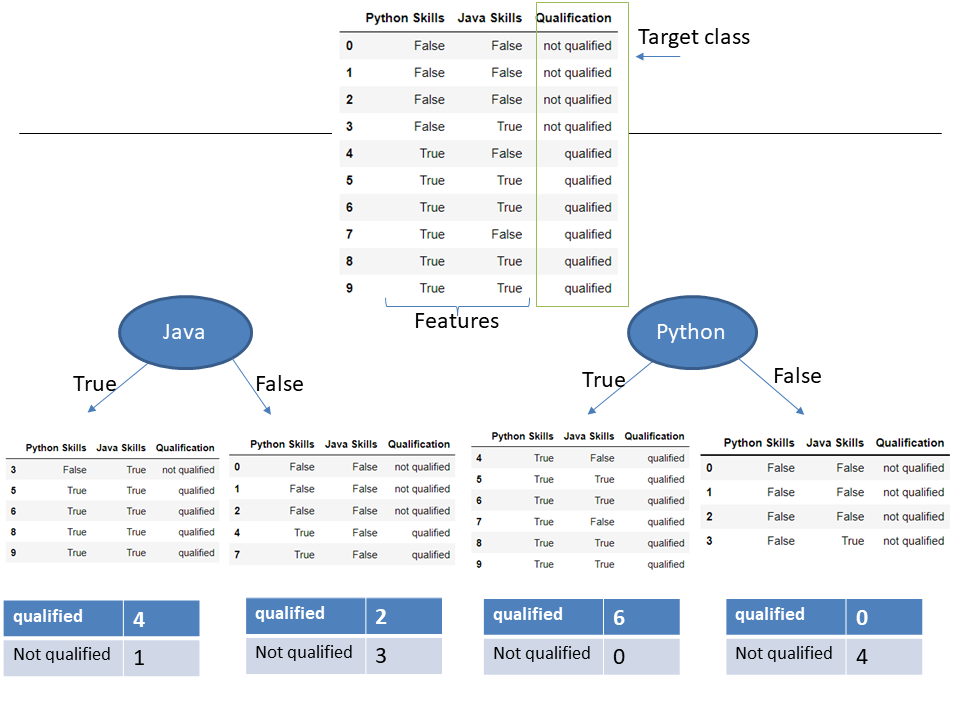

In [3]:
from IPython.display import Image
Image(filename = "pic2.png", width=900, height=900)

### Break according to Java skills

In [4]:
mask = df['Java Skills'] == True
with_Java_df = df[mask]
with_Java_df

,Python Skills,Java Skills,Qualification
3,False,True,not qualified
5,True,True,qualified
6,True,True,qualified
8,True,True,qualified
9,True,True,qualified


In [5]:
# we can invert mask by adding ~
without_java_df = df[~mask]
without_java_df

,Python Skills,Java Skills,Qualification
0,False,False,not qualified
1,False,False,not qualified
2,False,False,not qualified
4,True,False,qualified
7,True,False,qualified


In [14]:
# We can calculate entropy by hand

import numpy as np
from math import log

i, j =6/10,4/10
before_split = -i*log(i,2)-j*log(j,2)
print('before_split',before_split)

i,j=4/5,1/5
E_java_true = -i*log(i,2)-j*log(j,2)
print('E_java_true', E_java_true)

i,j=2/5,3/5
E_java_false = -i*log(i,2)-j*log(j,2)
print('E_java_false',E_java_false)

info = (E_java_true * 5/10)+(E_java_false * 5/10)
print('info',info)

gain = before_split-info
print('gain', gain)

before_split 0.9709505944546686
E_java_true 0.7219280948873623
E_java_false 0.9709505944546686
info 0.8464393446710154
gain 0.12451124978365313


The entropy for the two subsets above can be derived as follows:  
 </a>  
We now have the **information gain,** which is the number the decision tree looks at to determine which feature to use when it starts a new branch. Now 0.12452 is not that good, so lets try with the other feature - Python Skills.

In [15]:
mask = df['Python Skills'] == True
with_python_df = df[mask]
with_python_df

,Python Skills,Java Skills,Qualification
4,True,False,qualified
5,True,True,qualified
6,True,True,qualified
7,True,False,qualified
8,True,True,qualified
9,True,True,qualified


In [16]:
# we can invert mask by adding ~
without_python_df = df[~mask]
without_python_df

,Python Skills,Java Skills,Qualification
0,False,False,not qualified
1,False,False,not qualified
2,False,False,not qualified
3,False,True,not qualified


In [17]:
import numpy as np
from math import log


i=6/10
j=4/10


i,j=6/10,4/10
before_split = -i*log(i,2)-j*log(j,2)
print('before_split',before_split)

i,j=6/6,0
#E_python_true = -i*log(i,2)-j*log(j,2)
E_python_true = 0 
print('E_python_true', E_python_true)

i,j=0,4/4
#E_python_false = -i*log(i,2)-j*log(j,2)
E_python_false = 0
print('E_java_false',E_python_false)

info = (E_python_true * 5/10)+(E_python_false * 5/10)
print('info',info)

gain = before_split-info
print('gain', gain)

before_split 0.9709505944546686
E_python_true 0
E_java_false 0
info 0.0
gain 0.9709505944546686


In [18]:
import numpy as np
from math import log

# Define calculate_entropy function to make things easier
def calculate_entropy(labels):
    n_labels = len(labels)
    if n_labels <= 1:
        return 0
    value, counts = np.unique(labels, return_counts=True)
    probs = counts/n_labels
    n_classes = len(value)
    if n_classes <= 1:
        return 0
    entropy = 0
    for i in probs:
        entropy -= i*log(i,2)
    return entropy

In [19]:
# test our function with whole df
df_entropy = calculate_entropy(df['Qualification'])
df_entropy

0.9709505944546686

In [20]:
with_java_df_entropy = calculate_entropy(with_Java_df['Qualification'])
without_java_df_entropy = calculate_entropy(without_java_df['Qualification'])
print(with_java_df_entropy, without_java_df_entropy)

0.7219280948873623 0.9709505944546686


In [21]:
with_python_df_entropy = calculate_entropy(with_python_df['Qualification'])
without_python_df_entropy = calculate_entropy(without_python_df['Qualification'])
print(with_python_df_entropy, without_python_df_entropy)

0 0


Our entropy has gone down from 0.97095 to 0! So the information gain is 0.97095, this is a much better feature to use for our first branch, actually, we don't even need another branch in this case. Now you've understood how an ID3 algorithm works, the two other common algorithms for contructing decision trees are are C4.5 and CART.

## Coding the Decision Tree from Scratch
Now that we've understood the theory, we are going to implement the decision tree from scratch, by 'scratch' I mean with python, numpy and pandas. Before getting to the decision tree itself, let's define some helper functions that will make things easier.

### Helper Functions

In [22]:
import random
# the test_size parameter can be an int or float(proportion)
def train_test_split(df, test_size=0.30):
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))
    # pick a random sample from the entire dataframe with defined size
    test_indices = random.sample(population=df.index.tolist(), k=test_size)
    test_df = df.iloc[test_indices]
    train_df = df.drop(test_indices)
    return train_df, test_df

In [23]:
def split_by_feature(X, feature_idx, threshold):
    # if the feature is numerical
    if isinstance(threshold, int) or isinstance(threshold, float):
        X_true = X[X.iloc[:,feature_idx] >= threshold]
        X_false = X[~X.iloc[:,feature_idx] >= threshold]
    # if the feature is categorical
    else:
        X_true = X[X.iloc[:,feature_idx] == threshold]
        X_false = X[~X.iloc[:,feature_idx] == threshold]
    return X_true, X_false

## Tree-based algorithms
A tree consists of nodes connected by edges. A decision tree is typically, though not always, a binary tree, which has the following properties:
- One node is marked as Root node
- Every node other than the root has a parent node
- Each node can have at most 2 child nodes
  
To create a tree data structure we shall start by implementing a Node class (basically a container for values and references to other nodes)

In [24]:
class DecisionNode():
    def __init__(self, feature_idx=None, threshold=None, value=None, true_branch=None, false_branch=None):
        self.feature_idx = feature_idx # index of the feature that is used
        self.threshold = threshold # threshold value for feature when making the decision
        self.value = value # value if the node is a leaf in the tree
        self.true_branch = true_branch # the node we go to if decision returns True
        self.false_branch = false_branch # the node we go to if decision returns False

In [25]:
class DecisionTree():
    def __init__(self, min_info_gain=1e-7, max_depth=float("inf")):
        self.root = None # root of this tree
        self.min_info_gain = min_info_gain # minimum information gain to allow splitting
        self.max_depth = max_depth # maximum depth the tree grows to
    def fit(self, X, y):
        self.root = self.build_tree(X, y)
    def build_tree(self, X, y, current_depth=0):
        decision = None
        subtrees = None
        largest_info_gain = 0
        # add y as last column of X
        df = pd.concat((X, y), axis=1)
        n_rows, n_features = X.shape
        if current_depth <= self.max_depth:
            # iterate through every feature
            for feature_idx in range(n_features):
                # values of that column
                feature_values = X.iloc[:, feature_idx]
                unique_values = feature_values.unique()
                for threshold in unique_values:
                    X_true, X_false = split_by_feature(df, feature_idx, threshold)
                    if len(X_true) > 0 and len(X_false) > 0:
                        y_true = X_true.iloc[:,-1]
                        y_false = X_false.iloc[:,-1]
                        # Calculate impurity
                        info_gain = self.calculate_information_gain(y, y_true, y_false)
                        # Keep track of which feature gave the largest information gain
                        if info_gain > largest_info_gain:
                            largest_info_gain = info_gain
                            decision = {"feature_idx":feature_idx, "threshold":threshold}
                            subtrees = {"X_true":X_true.iloc[:,:-1],
                                        "y_true":y_true,
                                        "X_false":X_false.iloc[:,:-1],
                                        "y_false":y_false}
        # we will construct new branch if the information gain is larger than minimum information gain that we've defined
        if largest_info_gain > self.min_info_gain:
            true_branch = self.build_tree(subtrees["X_true"], subtrees["y_true"], current_depth+1)
            false_branch = self.build_tree(subtrees["X_false"], subtrees["y_false"], current_depth+1)
            return DecisionNode(feature_idx=decision["feature_idx"], threshold=decision["threshold"], true_branch=true_branch, false_branch=false_branch)

        # at leaf
        leaf_value = self.majority_vote(y)
        return DecisionNode(value=leaf_value)
                        
    def calculate_information_gain(self, y, y_true, y_false):
        # probability of choosing left subtree 
        p = len(y_true) / len(y)
        entropy = calculate_entropy(y)
        info_gain = entropy - p*calculate_entropy(y_true) - (1-p)*calculate_entropy(y_false)
        return info_gain
                
    def majority_vote(self, y):
        # this is for calculating values for the leaf nodes
        return y.value_counts().idxmax()
                
    def predict_value(self, x, tree=None):
        # recursive method to find the leaf node that corresponds to prediction
        if tree is None:
            tree = self.root
        if tree.value is not None:
            return tree.value
        feature_value = x[tree.feature_idx]
        branch = tree.false_branch
        if isinstance(feature_value, int) or isinstance(feature_value, float):
            if feature_value >= tree.threshold:
                branch = tree.true_branch
        elif feature_value == tree.threshold:
            branch = tree.true_branch
        return self.predict_value(x, branch)
    
    def predict(self, X):
        y_pred = []
        for idx, row in X.iterrows():
            y_pred.append(self.predict_value(row.values))
        return y_pred

In [28]:
tree = DecisionTree()
tree.fit(df.iloc[:,:-1], df.iloc[:,-1])

In [29]:
df.iloc[:,:-1]

,Python Skills,Java Skills
0,False,False
1,False,False
2,False,False
3,False,True
4,True,False
5,True,True
6,True,True
7,True,False
8,True,True
9,True,True


In [30]:
df.iloc[:,-1]

0    not qualified
1    not qualified
2    not qualified
3    not qualified
4        qualified
5        qualified
6        qualified
7        qualified
8        qualified
9        qualified
Name: Qualification, dtype: object

In [31]:
test_df = pd.DataFrame({'Python Skills':[True, True, False, False, False, True, True, True, True, True],
                     'Java Skills':[False, False, False, True, False, True, True, False, True, True]})
test_df

,Python Skills,Java Skills
0,True,False
1,True,False
2,False,False
3,False,True
4,False,False
5,True,True
6,True,True
7,True,False
8,True,True
9,True,True


In [32]:
tree.predict(test_df)

['qualified',
 'qualified',
 'not qualified',
 'not qualified',
 'not qualified',
 'qualified',
 'qualified',
 'qualified',
 'qualified',
 'qualified']

We've made it!!! This is a decision tree from scratch, if you like this kernel please **upvote**. if you wish to see more contents like this please leave your comments below, I'll be very very glad to help you :D